# Python version of modal and average control

Downloaded the structural connectivity matrix from Dani's website. This file contains a bunch of dti adjacency matrices in a complex struct. So we load it first in octave 

Populating the interactive namespace from numpy and matplotlib
dict_keys(['__header__', '__version__', '__globals__', 'A', 'ans', 'ave_normed_A', 'ave_normed_P', 'ave_normed_T', 'ave_normed_U', 'ave_normed_midMat', 'ave_normed_norm_value', 'ave_normed_v', 'ave_normed_values', 'averesults1', 'averesults2', 'examplemat1', 'examplemat2', 'i', 'learningData', 'modal_normed_A', 'modal_normed_N', 'modal_normed_T', 'modal_normed_U', 'modal_normed_eigVals', 'modal_normed_norm_value', 'modal_normed_phi', 'modal_normed_values', 'modalresults1', 'modalresults2'])


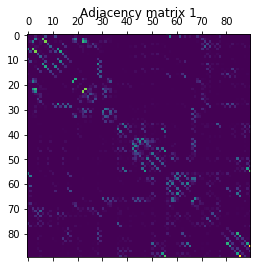

In [1]:
%pylab inline
from scipy.io.matlab import loadmat

mat = loadmat("matlab_data.mat")
print( mat.keys())

locals().update(mat)

matshow(examplemat1)
title("Adjacency matrix 1");

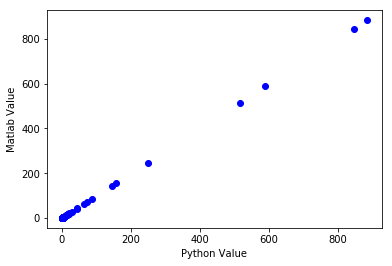

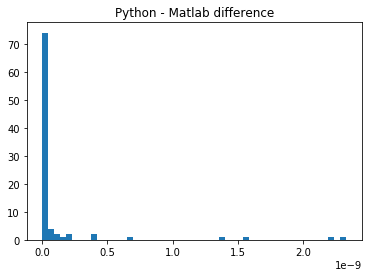

In [2]:
import numpy as np
from scipy.linalg import schur, svd
def ave_control(A):
    Anormed = A / (1 + svd(A)[1][0])   # Matrix normalization 
    T, U = schur(Anormed,'real')    # Schur stability

    midMat = (U**2).T
    v = np.diag(T)
    P = np.column_stack([1 - v*v.T] * A.shape[0])
    return np.sum(midMat/P, axis=0)

py_ave_control = ave_control(examplemat1)
assert np.allclose(py_ave_control, ave_normed_values.squeeze())

plot(py_ave_control, ave_normed_values.squeeze(), 'bo')
xlabel("Python Value")
ylabel("Matlab Value")
figure()
hist(py_ave_control - ave_normed_values.squeeze(), bins=50)
title("Python - Matlab difference");


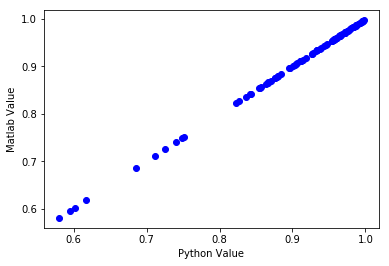

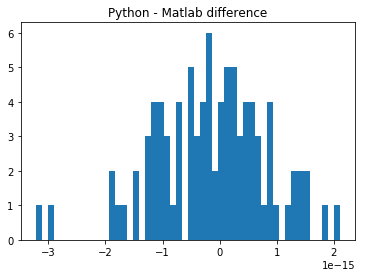

In [3]:
def modal_control(A):
    Anormed = A / (1 + svd(A)[1][0])   # Matrix normalization 
    T, U = schur(Anormed,'real')    # Schur stability
    
    eigVals = diag(T)
    N = A.shape[0]
    phi = np.zeros(N)
    
    b = 1-eigVals**2
    U2 = U**2
    for i in range(N):
        phi[i] = np.dot(U2[i], b)
    return phi

py_modal_control = modal_control(examplemat1)
assert np.allclose(py_modal_control, modal_normed_values.squeeze())

plot(py_modal_control, modal_normed_values.squeeze(), 'bo')
xlabel("Python Value")
ylabel("Matlab Value")
figure()
hist(py_modal_control - modal_normed_values.squeeze(), bins=50)
title("Python - Matlab difference");
